## Introduction
The capacity to offer customers tailored content recommendations has emerged as a critical component of user happiness and platform success in an era of rapidly expanding digital entertainment platforms. This research explores the field of movie recommendation systems by utilizing MovieLens' rich "ml-latest-small" dataset..

In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd                 # For working with dataframes
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

### Load Dataset

In [2]:
movies_df = pd.read_csv('Data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", movies_df.shape[0])
print("Number of Columns:", movies_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [4]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(movies_df.dtypes)

Data Types of Columns:
movieId     int64
title      object
genres     object
dtype: object


### Load `ratings.csv`


In [5]:
ratings_df = pd.read_csv('Data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", ratings_df.shape[0])
print("Number of Columns:", ratings_df.shape[1])

Dataset Shape:
Number of Rows: 100836
Number of Columns: 4


In [7]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(ratings_df.dtypes)

Data Types of Columns:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [8]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Key Insights from ratings_df:**

1. **Rating Range:** Users have provided ratings in a range from 0.5 to 5.0, indicating diverse opinions about the movies.

2. **Average Rating:** The average rating across all movies is 3.5, suggesting that users, on average, tend to give moderate ratings.

3. **User IDs:** The dataset includes user IDs ranging from 1 to 610, representing a total of 610 unique users.

4. **Movie IDs:** Movie IDs span from 1 to 193609, with 193609 being the highest movie ID. Note that this represents the highest movie ID and not necessarily the total count of movies in the dataset.

These insights provide a foundational understanding of the dataset's characteristics and the user-movie interactions.

Lets drop timestamp since we won't need it🗑🗑🗄🗄

### Loading `tags.csv`

In [9]:
tags_df = pd.read_csv('Data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", tags_df.shape[0])
print("Number of Columns:", tags_df.shape[1])

Dataset Shape:
Number of Rows: 3683
Number of Columns: 4


In [11]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(tags_df.dtypes)

Data Types of Columns:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [12]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [13]:
ratings_df.drop(['timestamp'], axis=1, inplace=True)

### Loading `links.csv`

In [14]:
links_df = pd.read_csv('Data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", links_df.shape[0])
print("Number of Columns:", links_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [16]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(links_df.dtypes)

Data Types of Columns:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


In [17]:
links_df.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


## Merge `movies_df` & `ratings_df`

Most import dataset for the analysis

In [18]:
# Merge the datasets on the 'movieId' column
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

In [19]:
# Display the first five rows of the merged dataset
print("Merged_df head:")
print("============================")
merged_df.head()

Merged_df head:


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [20]:
print("Merged Dataset Shape:")
print("==========================")
print("Number of Rows:", merged_df.shape[0])
print("Number of Columns:", merged_df.shape[1])

Merged Dataset Shape:
Number of Rows: 100836
Number of Columns: 5


## Visualization on the dataset

In [21]:
# Split the genres within each entry and create a list of genres
def find_genres(movies_df):
    genres = {}  # dictionary to store different genre values

    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

In [22]:
genre_counts = find_genres(movies_df)
genre_counts

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [23]:
# First, split the genres within each entry and create a list of genres
genres_list = movies_df['genres'].str.split('|').tolist()

# Now, flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Print the counts of each genre
print(genre_counts)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [24]:
# First, split the genres within each entry and create a list of genres
genres_list = movies_df['genres'].str.split('|').tolist()

# Now, flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Convert the series to a dictionary
genre_counts_dict = genre_counts.to_dict()

# Print the genre counts as a dictionary
print(genre_counts_dict)

{'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34}


In [25]:
genre_counts['None'] = genre_counts.pop('(no genres listed)')

In [26]:
genre_counts

Drama          4361
Comedy         3756
Thriller       1894
Action         1828
Romance        1596
Adventure      1263
Crime          1199
Sci-Fi          980
Horror          978
Fantasy         779
Children        664
Animation       611
Mystery         573
Documentary     440
War             382
Musical         334
Western         167
IMAX            158
Film-Noir        87
None             34
Name: count, dtype: int64

## Check for  Missing Values

In [27]:
merged_df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

## Explotary Data Analysis

### Highly Rated Movies

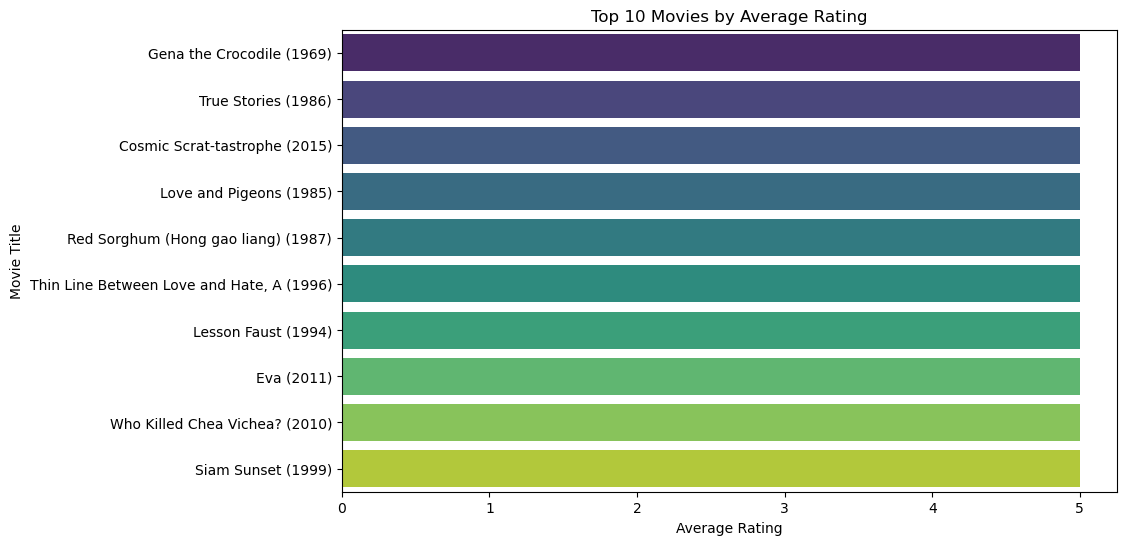

In [33]:
# the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

## Collaborative Filtering

`Memory-Based CF:` The approach that relies on finding similarities between users or items to recommend similar items. It typically involves techniques such as Neighbourhood-based CF, where recommendations are made based on the preferences of similar users or items.

`Model-Based CF:` : This approach utilizes various data mining and machine learning algorithms to predict users' ratings or preferences for unrated items. One example of model-based CF is Principal Component Analysis (PCA), which helps identify the most significant components or features in the data and use them to make predictions.

### User-Item Matrix

In [34]:
# pivot table to transform the merged DataFrame into a user-item matrix
pivot_matrix = merged_df.pivot_table(
    index='userId',        # Rows will be indexed by 'userId'
    columns='title',       # Columns will be indexed by 'title'
    values='rating'        # The values in the matrix will be 'rating'
)

# print the first 10 rows of the `pivot_matrix`
pivot_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
